___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1<br><br>Churn Data<br><h1>

# Keras Classification

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.set_option('display.max_columns', None)

## Exploratory Data Analysis and Visualization

In [4]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.duplicated().sum()

0

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [8]:
df.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)

In [9]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

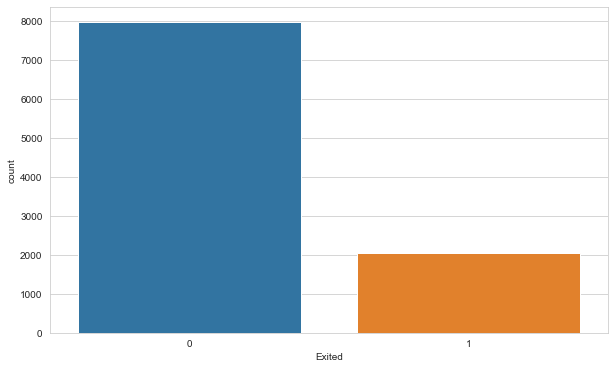

In [10]:
sns.countplot(df["Exited"]);

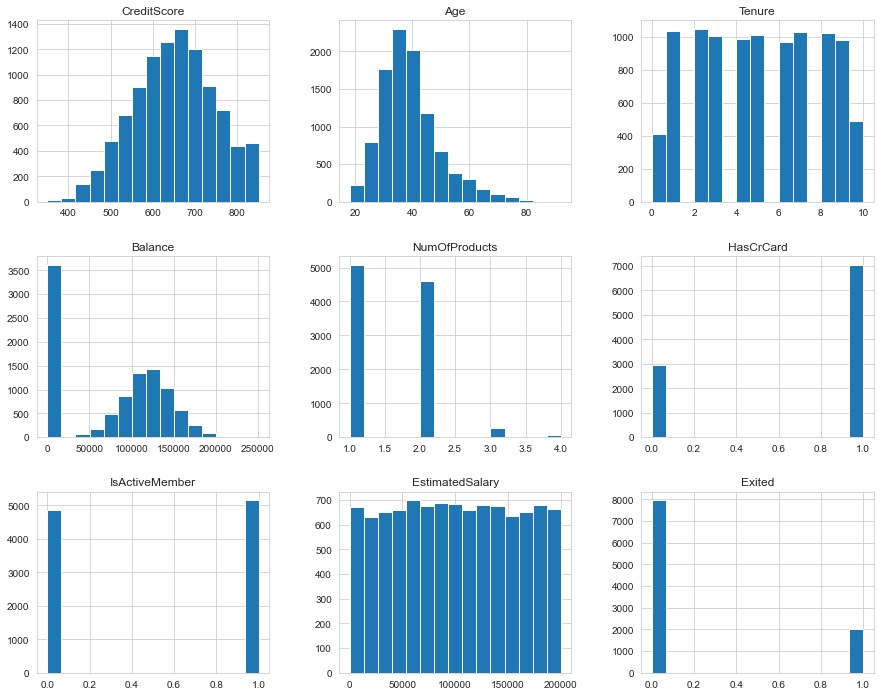

In [11]:
df.hist(figsize=(15,12), bins=15);

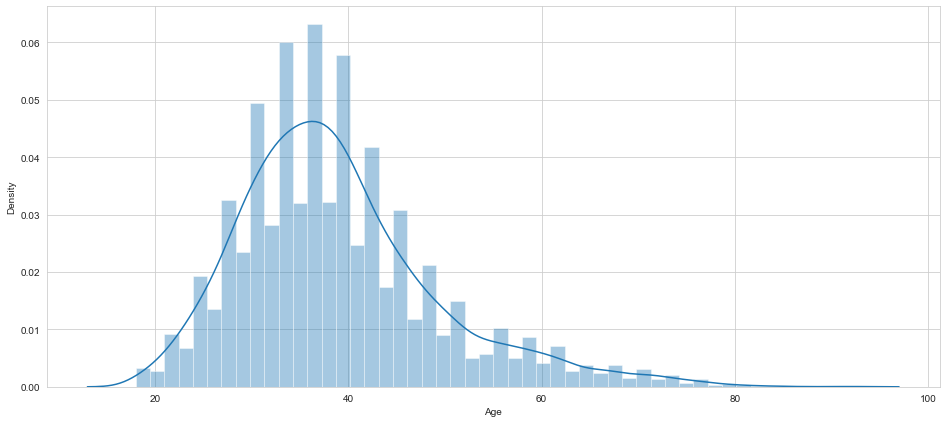

In [12]:
plt.figure(figsize=(16,7))
sns.distplot(df.Age);

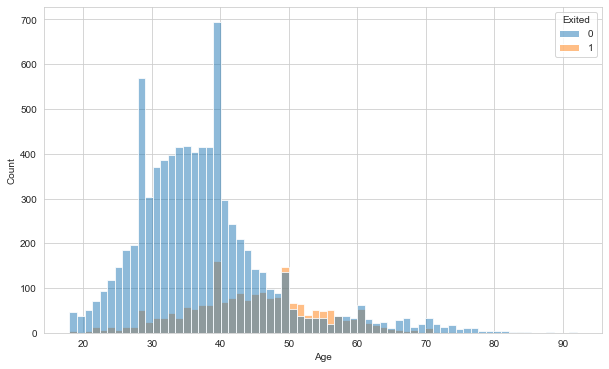

In [13]:
sns.histplot(data=df, x="Age", hue="Exited", fill=True);

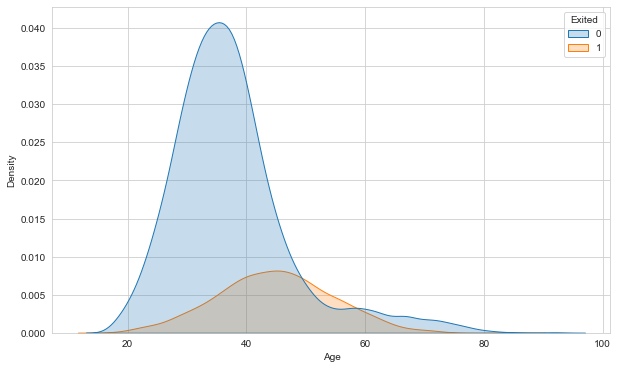

In [14]:
sns.kdeplot(data=df, x="Age", hue="Exited", fill=True);

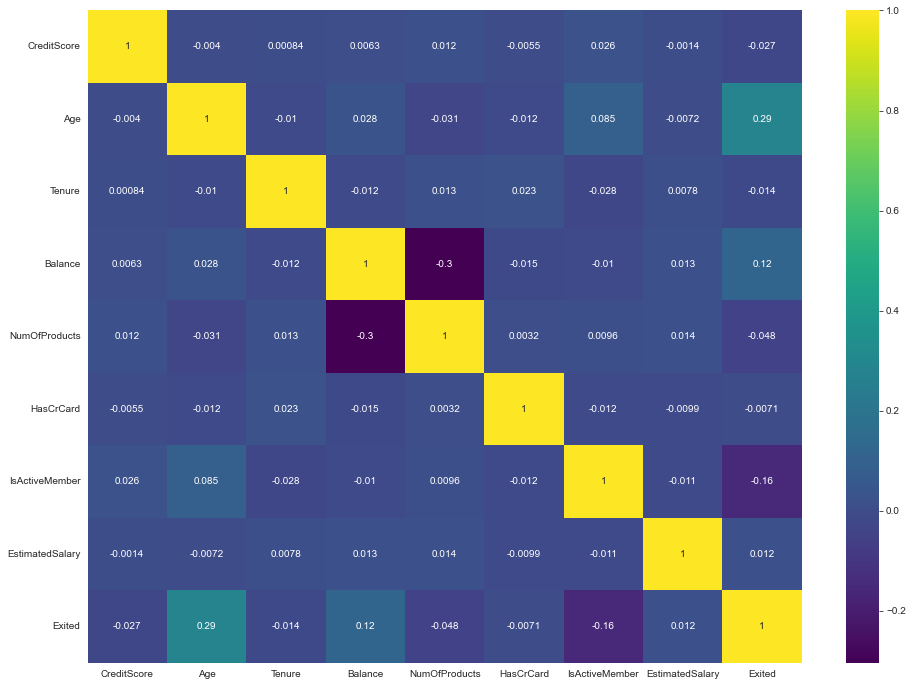

In [15]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(), annot=True, cmap="viridis");

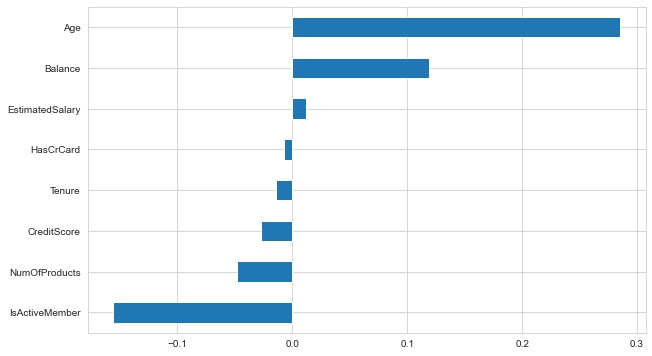

In [16]:
df.corr()["Exited"][:-1].sort_values().plot.barh();

In [17]:
df=pd.get_dummies(df, drop_first=True)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1,0,0,0
1,608,41,1,83807.860,1,0,1,112542.580,0,0,1,0
2,502,42,8,159660.800,3,1,0,113931.570,1,0,0,0
3,699,39,1,0.000,2,0,0,93826.630,0,0,0,0
4,850,43,2,125510.820,1,1,1,79084.100,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.000,2,1,0,96270.640,0,0,0,1
9996,516,35,10,57369.610,1,1,1,101699.770,0,0,0,1
9997,709,36,7,0.000,1,0,1,42085.580,1,0,0,0
9998,772,42,3,75075.310,2,1,0,92888.520,1,1,0,1


## Preprocessing of Data
- Train | Test Split, Scalling

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [19]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [20]:
seed = 42

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.10, random_state = seed)

In [22]:
scaler = MinMaxScaler()

In [23]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelling & Model Performance

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [25]:
X_train.shape

(9000, 11)

In [26]:
X_test.shape

(1000, 11)

In [30]:
#tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(22, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(12, activation = "relu"))
model.add(Dense(6, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])

In [32]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 100, epochs = 350, verbose=1)

Epoch 1/350
81/81 [==============================] - 0s 2ms/step - loss: 0.2849 - recall: 0.5557 - val_loss: 0.3232 - val_recall: 0.5691
Epoch 2/350
81/81 [==============================] - 0s 2ms/step - loss: 0.2835 - recall: 0.5617 - val_loss: 0.3278 - val_recall: 0.5359
Epoch 3/350
81/81 [==============================] - 0s 2ms/step - loss: 0.2831 - recall: 0.5442 - val_loss: 0.3340 - val_recall: 0.5580
Epoch 4/350
81/81 [==============================] - 0s 2ms/step - loss: 0.2827 - recall: 0.5563 - val_loss: 0.3304 - val_recall: 0.5083
Epoch 5/350
81/81 [==============================] - 0s 2ms/step - loss: 0.2832 - recall: 0.5569 - val_loss: 0.3263 - val_recall: 0.5691
Epoch 6/350
81/81 [==============================] - 0s 2ms/step - loss: 0.2829 - recall: 0.5551 - val_loss: 0.3255 - val_recall: 0.5635
Epoch 7/350
81/81 [==============================] - 0s 2ms/step - loss: 0.2826 - recall: 0.5599 - val_loss: 0.3268 - val_recall: 0.5691
Epoch 8/350
81/81 [======================

81/81 [==============================] - 0s 2ms/step - loss: 0.2834 - recall: 0.5533 - val_loss: 0.3292 - val_recall: 0.5525
Epoch 61/350
81/81 [==============================] - 0s 2ms/step - loss: 0.2836 - recall: 0.5605 - val_loss: 0.3314 - val_recall: 0.5525
Epoch 62/350
81/81 [==============================] - 0s 2ms/step - loss: 0.2835 - recall: 0.5593 - val_loss: 0.3315 - val_recall: 0.5249
Epoch 63/350
81/81 [==============================] - 0s 2ms/step - loss: 0.2830 - recall: 0.5563 - val_loss: 0.3353 - val_recall: 0.4972
Epoch 64/350
81/81 [==============================] - 0s 2ms/step - loss: 0.2829 - recall: 0.5581 - val_loss: 0.3329 - val_recall: 0.5359
Epoch 65/350
81/81 [==============================] - 0s 2ms/step - loss: 0.2822 - recall: 0.5617 - val_loss: 0.3368 - val_recall: 0.5304
Epoch 66/350
81/81 [==============================] - 0s 2ms/step - loss: 0.2827 - recall: 0.5611 - val_loss: 0.3358 - val_recall: 0.5304
Epoch 67/350
81/81 [===========================

81/81 [==============================] - 0s 4ms/step - loss: 0.2834 - recall: 0.5533 - val_loss: 0.3368 - val_recall: 0.5304
Epoch 120/350
81/81 [==============================] - 0s 4ms/step - loss: 0.2818 - recall: 0.5605 - val_loss: 0.3434 - val_recall: 0.5249
Epoch 121/350
81/81 [==============================] - 0s 4ms/step - loss: 0.2828 - recall: 0.5581 - val_loss: 0.3420 - val_recall: 0.5359
Epoch 122/350
81/81 [==============================] - 0s 4ms/step - loss: 0.2818 - recall: 0.5593 - val_loss: 0.3387 - val_recall: 0.5635
Epoch 123/350
81/81 [==============================] - 0s 4ms/step - loss: 0.2816 - recall: 0.5581 - val_loss: 0.3397 - val_recall: 0.5580
Epoch 124/350
81/81 [==============================] - 0s 4ms/step - loss: 0.2832 - recall: 0.5630 - val_loss: 0.3331 - val_recall: 0.5580
Epoch 125/350
81/81 [==============================] - 0s 4ms/step - loss: 0.2825 - recall: 0.5563 - val_loss: 0.3332 - val_recall: 0.5580
Epoch 126/350
81/81 [====================

81/81 [==============================] - 0s 2ms/step - loss: 0.2824 - recall: 0.5605 - val_loss: 0.3385 - val_recall: 0.5580
Epoch 179/350
81/81 [==============================] - 0s 2ms/step - loss: 0.2818 - recall: 0.5636 - val_loss: 0.3360 - val_recall: 0.5525
Epoch 180/350
81/81 [==============================] - 0s 2ms/step - loss: 0.2804 - recall: 0.5660 - val_loss: 0.3376 - val_recall: 0.5138
Epoch 181/350
81/81 [==============================] - 0s 2ms/step - loss: 0.2813 - recall: 0.5623 - val_loss: 0.3489 - val_recall: 0.5580
Epoch 182/350
81/81 [==============================] - 0s 2ms/step - loss: 0.2821 - recall: 0.5563 - val_loss: 0.3461 - val_recall: 0.5635
Epoch 183/350
81/81 [==============================] - 0s 2ms/step - loss: 0.2804 - recall: 0.5666 - val_loss: 0.3395 - val_recall: 0.5635
Epoch 184/350
81/81 [==============================] - 0s 2ms/step - loss: 0.2810 - recall: 0.5642 - val_loss: 0.3478 - val_recall: 0.5359
Epoch 185/350
81/81 [====================

81/81 [==============================] - 0s 2ms/step - loss: 0.2792 - recall: 0.5684 - val_loss: 0.3410 - val_recall: 0.5304
Epoch 238/350
81/81 [==============================] - 0s 2ms/step - loss: 0.2792 - recall: 0.5672 - val_loss: 0.3461 - val_recall: 0.5359
Epoch 239/350
81/81 [==============================] - 0s 2ms/step - loss: 0.2817 - recall: 0.5557 - val_loss: 0.3399 - val_recall: 0.5028
Epoch 240/350
81/81 [==============================] - 0s 2ms/step - loss: 0.2812 - recall: 0.5551 - val_loss: 0.3472 - val_recall: 0.5414
Epoch 241/350
81/81 [==============================] - 0s 2ms/step - loss: 0.2809 - recall: 0.5642 - val_loss: 0.3428 - val_recall: 0.5525
Epoch 242/350
81/81 [==============================] - 0s 2ms/step - loss: 0.2798 - recall: 0.5660 - val_loss: 0.3374 - val_recall: 0.5359
Epoch 243/350
81/81 [==============================] - 0s 2ms/step - loss: 0.2797 - recall: 0.5587 - val_loss: 0.3481 - val_recall: 0.5525
Epoch 244/350
81/81 [====================

81/81 [==============================] - 0s 2ms/step - loss: 0.2780 - recall: 0.5763 - val_loss: 0.3503 - val_recall: 0.5414
Epoch 297/350
81/81 [==============================] - 0s 2ms/step - loss: 0.2786 - recall: 0.5617 - val_loss: 0.3444 - val_recall: 0.5801
Epoch 298/350
81/81 [==============================] - 0s 2ms/step - loss: 0.2794 - recall: 0.5696 - val_loss: 0.3410 - val_recall: 0.5359
Epoch 299/350
81/81 [==============================] - 0s 2ms/step - loss: 0.2792 - recall: 0.5630 - val_loss: 0.3479 - val_recall: 0.5304
Epoch 300/350
81/81 [==============================] - 0s 2ms/step - loss: 0.2783 - recall: 0.5714 - val_loss: 0.3487 - val_recall: 0.5249
Epoch 301/350
81/81 [==============================] - 0s 2ms/step - loss: 0.2788 - recall: 0.5654 - val_loss: 0.3443 - val_recall: 0.5525
Epoch 302/350
81/81 [==============================] - 0s 2ms/step - loss: 0.2788 - recall: 0.5702 - val_loss: 0.3516 - val_recall: 0.5470
Epoch 303/350
81/81 [====================

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 22)                264       
                                                                 
 dense_1 (Dense)             (None, 12)                276       
                                                                 
 dense_2 (Dense)             (None, 6)                 78        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 625
Trainable params: 625
Non-trainable params: 0
_________________________________________________________________


In [34]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.285,0.556,0.323,0.569
1,0.284,0.562,0.328,0.536
2,0.283,0.544,0.334,0.558
3,0.283,0.556,0.330,0.508
4,0.283,0.557,0.326,0.569


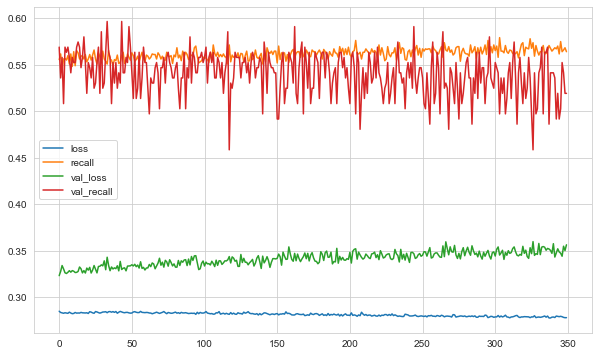

In [35]:
loss_df.plot();

In [36]:
model.evaluate(X_test, y_test, verbose=0)

[0.41897639632225037, 0.3921568691730499]

In [37]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.41897639632225037
accuracy :  0.3921568691730499


In [38]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[755  41]
 [124  80]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       796
           1       0.66      0.39      0.49       204

    accuracy                           0.83      1000
   macro avg       0.76      0.67      0.70      1000
weighted avg       0.82      0.83      0.82      1000



### EarlyStopping

In [39]:
from tensorflow.keras.callbacks import EarlyStopping

In [74]:
#tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(22, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(12, activation = "relu"))
model.add(Dense(6, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])

In [75]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 20, restore_best_weights = True)

In [76]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 50, epochs = 350, verbose = 1,
          callbacks = [early_stop])

Epoch 1/350
162/162 [==============================] - 1s 3ms/step - loss: 0.5045 - recall: 0.0000e+00 - val_loss: 0.4678 - val_recall: 0.0000e+00
Epoch 2/350
162/162 [==============================] - 0s 3ms/step - loss: 0.4698 - recall: 0.0000e+00 - val_loss: 0.4457 - val_recall: 0.0000e+00
Epoch 3/350
162/162 [==============================] - 1s 3ms/step - loss: 0.4512 - recall: 0.0599 - val_loss: 0.4177 - val_recall: 0.1381
Epoch 4/350
162/162 [==============================] - 1s 3ms/step - loss: 0.4334 - recall: 0.1423 - val_loss: 0.3992 - val_recall: 0.1823
Epoch 5/350
162/162 [==============================] - 0s 3ms/step - loss: 0.4229 - recall: 0.2052 - val_loss: 0.3862 - val_recall: 0.2818
Epoch 6/350
162/162 [==============================] - 1s 3ms/step - loss: 0.4129 - recall: 0.2312 - val_loss: 0.3720 - val_recall: 0.3867
Epoch 7/350
162/162 [==============================] - 1s 3ms/step - loss: 0.4026 - recall: 0.2785 - val_loss: 0.3636 - val_recall: 0.2818
Epoch 8/350

162/162 [==============================] - 0s 3ms/step - loss: 0.3317 - recall: 0.4818 - val_loss: 0.2956 - val_recall: 0.5470
Epoch 60/350
162/162 [==============================] - 0s 3ms/step - loss: 0.3304 - recall: 0.4915 - val_loss: 0.2939 - val_recall: 0.5028
Epoch 61/350
162/162 [==============================] - 0s 3ms/step - loss: 0.3311 - recall: 0.4794 - val_loss: 0.2909 - val_recall: 0.5470
Epoch 62/350
162/162 [==============================] - 0s 2ms/step - loss: 0.3297 - recall: 0.4782 - val_loss: 0.2958 - val_recall: 0.5635
Epoch 63/350
162/162 [==============================] - 0s 1ms/step - loss: 0.3301 - recall: 0.4800 - val_loss: 0.2959 - val_recall: 0.6022
Epoch 64/350
162/162 [==============================] - 0s 2ms/step - loss: 0.3311 - recall: 0.4891 - val_loss: 0.2917 - val_recall: 0.5525
Epoch 65/350
162/162 [==============================] - 0s 1ms/step - loss: 0.3305 - recall: 0.4903 - val_loss: 0.2913 - val_recall: 0.5359
Epoch 66/350
162/162 [===========

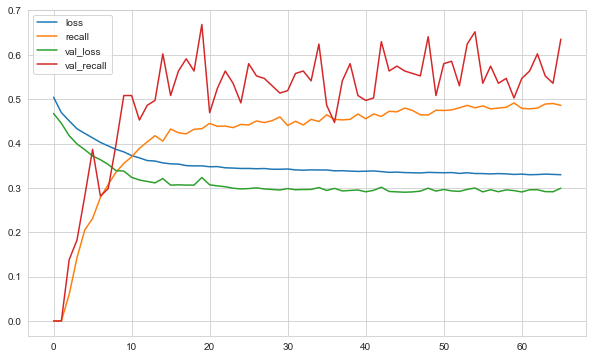

In [77]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [72]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("Recall : ", accuracy)

loss :  0.4796982407569885
Recall :  0.0


In [46]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 997us/step
[[765  31]
 [116  88]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       796
           1       0.74      0.43      0.54       204

    accuracy                           0.85      1000
   macro avg       0.80      0.70      0.73      1000
weighted avg       0.84      0.85      0.84      1000



## Precision-Recall Curve And AP

32/32 [==============================] - 0s 2ms/step


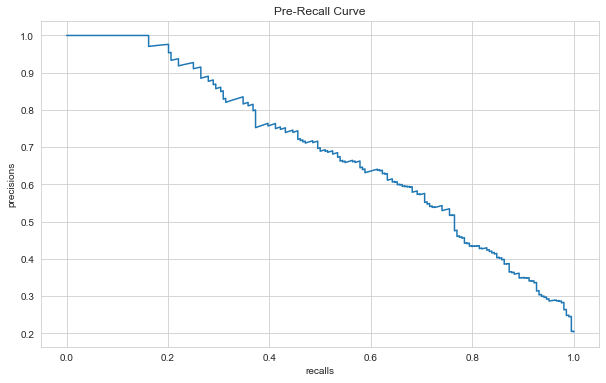

In [53]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label="ANN")
plt.xlabel("recalls")
plt.ylabel("precisions")
plt.title("Pre-Recall Curve")
plt.show()

In [54]:
average_precision_score(y_test,y_pred_proba)

0.6927931146816444

### learning_rate

In [55]:
from tensorflow.keras.optimizers import Adam

In [57]:
#tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(22, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(12, activation = "relu"))
model.add(Dense(6, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [58]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 20, restore_best_weights = True)

In [59]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 50, epochs = 350, verbose = 1,
          callbacks = [early_stop])

Epoch 1/350
162/162 [==============================] - 1s 3ms/step - loss: 0.4695 - recall: 6.0533e-04 - val_loss: 0.4244 - val_recall: 0.0000e+00
Epoch 2/350
162/162 [==============================] - 0s 1ms/step - loss: 0.4351 - recall: 0.1253 - val_loss: 0.4035 - val_recall: 0.2099
Epoch 3/350
162/162 [==============================] - 0s 1ms/step - loss: 0.3983 - recall: 0.3027 - val_loss: 0.3335 - val_recall: 0.4420
Epoch 4/350
162/162 [==============================] - 0s 2ms/step - loss: 0.3678 - recall: 0.3965 - val_loss: 0.3082 - val_recall: 0.5138
Epoch 5/350
162/162 [==============================] - 0s 2ms/step - loss: 0.3580 - recall: 0.4262 - val_loss: 0.3204 - val_recall: 0.5580
Epoch 6/350
162/162 [==============================] - 0s 2ms/step - loss: 0.3557 - recall: 0.4346 - val_loss: 0.3143 - val_recall: 0.5746
Epoch 7/350
162/162 [==============================] - 0s 2ms/step - loss: 0.3550 - recall: 0.4370 - val_loss: 0.3037 - val_recall: 0.4862
Epoch 8/350
162/162

<AxesSubplot:>

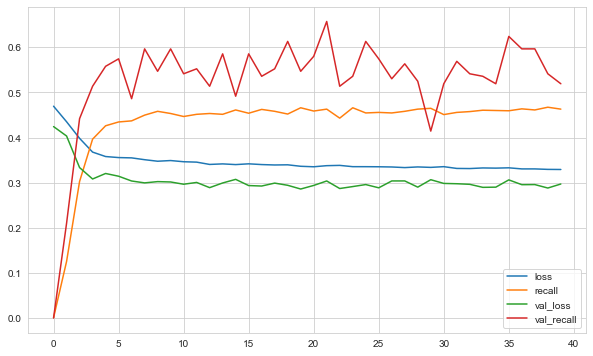

In [60]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [61]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3452850878238678
accuracy :  0.45098039507865906


In [80]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[765  31]
 [110  94]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.92       796
           1       0.75      0.46      0.57       204

    accuracy                           0.86      1000
   macro avg       0.81      0.71      0.74      1000
weighted avg       0.85      0.86      0.85      1000



### Dropout

The Dropout layer randomly sets input units to 0 with a frequency of `rate`
at each step during training time, which helps prevent overfitting.

In [81]:
from tensorflow.keras.layers import Dropout

In [82]:
#tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(22, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))

model.add(Dense(12, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(6, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [83]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 20, epochs = 350, verbose = 1)

Epoch 1/350
405/405 [==============================] - 2s 3ms/step - loss: 0.5898 - recall: 0.0569 - val_loss: 0.5057 - val_recall: 0.0000e+00
Epoch 2/350
405/405 [==============================] - 1s 2ms/step - loss: 0.5280 - recall: 0.0000e+00 - val_loss: 0.4914 - val_recall: 0.0000e+00
Epoch 3/350
405/405 [==============================] - 0s 1ms/step - loss: 0.5163 - recall: 0.0000e+00 - val_loss: 0.4816 - val_recall: 0.0000e+00
Epoch 4/350
405/405 [==============================] - 0s 1ms/step - loss: 0.5070 - recall: 0.0000e+00 - val_loss: 0.4754 - val_recall: 0.0000e+00
Epoch 5/350
405/405 [==============================] - 0s 1ms/step - loss: 0.4987 - recall: 0.0000e+00 - val_loss: 0.4636 - val_recall: 0.0000e+00
Epoch 6/350
405/405 [==============================] - 1s 1ms/step - loss: 0.4872 - recall: 0.0018 - val_loss: 0.4522 - val_recall: 0.0000e+00
Epoch 7/350
405/405 [==============================] - 1s 1ms/step - loss: 0.4821 - recall: 0.0151 - val_loss: 0.4492 - val_re

Epoch 59/350
405/405 [==============================] - 1s 3ms/step - loss: 0.4160 - recall: 0.2119 - val_loss: 0.3348 - val_recall: 0.3978
Epoch 60/350
405/405 [==============================] - 1s 3ms/step - loss: 0.4177 - recall: 0.2022 - val_loss: 0.3342 - val_recall: 0.4254
Epoch 61/350
405/405 [==============================] - 1s 3ms/step - loss: 0.4151 - recall: 0.2203 - val_loss: 0.3356 - val_recall: 0.3094
Epoch 62/350
405/405 [==============================] - 1s 2ms/step - loss: 0.4169 - recall: 0.1955 - val_loss: 0.3352 - val_recall: 0.3481
Epoch 63/350
405/405 [==============================] - 1s 1ms/step - loss: 0.4169 - recall: 0.2119 - val_loss: 0.3334 - val_recall: 0.3591
Epoch 64/350
405/405 [==============================] - 1s 1ms/step - loss: 0.4141 - recall: 0.2064 - val_loss: 0.3315 - val_recall: 0.4033
Epoch 65/350
405/405 [==============================] - 1s 1ms/step - loss: 0.4158 - recall: 0.1992 - val_loss: 0.3302 - val_recall: 0.3536
Epoch 66/350
405/405

405/405 [==============================] - 1s 2ms/step - loss: 0.4146 - recall: 0.2264 - val_loss: 0.3219 - val_recall: 0.3812
Epoch 118/350
405/405 [==============================] - 1s 2ms/step - loss: 0.4110 - recall: 0.2270 - val_loss: 0.3242 - val_recall: 0.3646
Epoch 119/350
405/405 [==============================] - 1s 3ms/step - loss: 0.4073 - recall: 0.2215 - val_loss: 0.3129 - val_recall: 0.4254
Epoch 120/350
405/405 [==============================] - 1s 3ms/step - loss: 0.4079 - recall: 0.2324 - val_loss: 0.3328 - val_recall: 0.3812
Epoch 121/350
405/405 [==============================] - 1s 3ms/step - loss: 0.4046 - recall: 0.2252 - val_loss: 0.3230 - val_recall: 0.4420
Epoch 122/350
405/405 [==============================] - 1s 3ms/step - loss: 0.4082 - recall: 0.2258 - val_loss: 0.3254 - val_recall: 0.4199
Epoch 123/350
405/405 [==============================] - 1s 3ms/step - loss: 0.4078 - recall: 0.2209 - val_loss: 0.3215 - val_recall: 0.4309
Epoch 124/350
405/405 [====

405/405 [==============================] - 0s 1ms/step - loss: 0.4057 - recall: 0.2427 - val_loss: 0.3203 - val_recall: 0.4365
Epoch 176/350
405/405 [==============================] - 0s 1ms/step - loss: 0.4067 - recall: 0.2561 - val_loss: 0.3184 - val_recall: 0.4033
Epoch 177/350
405/405 [==============================] - 0s 1ms/step - loss: 0.4052 - recall: 0.2324 - val_loss: 0.3186 - val_recall: 0.4365
Epoch 178/350
405/405 [==============================] - 0s 1ms/step - loss: 0.4057 - recall: 0.2567 - val_loss: 0.3187 - val_recall: 0.4088
Epoch 179/350
405/405 [==============================] - 0s 1ms/step - loss: 0.4130 - recall: 0.2300 - val_loss: 0.3288 - val_recall: 0.3481
Epoch 180/350
405/405 [==============================] - 0s 1ms/step - loss: 0.4010 - recall: 0.2573 - val_loss: 0.3174 - val_recall: 0.4309
Epoch 181/350
405/405 [==============================] - 0s 1ms/step - loss: 0.4041 - recall: 0.2506 - val_loss: 0.3147 - val_recall: 0.4144
Epoch 182/350
405/405 [====

405/405 [==============================] - 0s 1ms/step - loss: 0.4055 - recall: 0.2306 - val_loss: 0.3246 - val_recall: 0.4088
Epoch 234/350
405/405 [==============================] - 0s 1ms/step - loss: 0.4097 - recall: 0.2318 - val_loss: 0.3301 - val_recall: 0.3702
Epoch 235/350
405/405 [==============================] - 0s 1ms/step - loss: 0.4001 - recall: 0.2385 - val_loss: 0.3181 - val_recall: 0.3923
Epoch 236/350
405/405 [==============================] - 1s 1ms/step - loss: 0.4055 - recall: 0.2470 - val_loss: 0.3132 - val_recall: 0.4199
Epoch 237/350
405/405 [==============================] - 1s 1ms/step - loss: 0.4027 - recall: 0.2609 - val_loss: 0.3105 - val_recall: 0.4530
Epoch 238/350
405/405 [==============================] - 1s 2ms/step - loss: 0.4028 - recall: 0.2452 - val_loss: 0.3211 - val_recall: 0.3757
Epoch 239/350
405/405 [==============================] - 1s 2ms/step - loss: 0.4085 - recall: 0.2446 - val_loss: 0.3178 - val_recall: 0.3812
Epoch 240/350
405/405 [====

405/405 [==============================] - 1s 2ms/step - loss: 0.4047 - recall: 0.2379 - val_loss: 0.3214 - val_recall: 0.4144
Epoch 292/350
405/405 [==============================] - 1s 2ms/step - loss: 0.4106 - recall: 0.2324 - val_loss: 0.3196 - val_recall: 0.3923
Epoch 293/350
405/405 [==============================] - 1s 2ms/step - loss: 0.4031 - recall: 0.2536 - val_loss: 0.3215 - val_recall: 0.3978
Epoch 294/350
405/405 [==============================] - 1s 3ms/step - loss: 0.4077 - recall: 0.2512 - val_loss: 0.3201 - val_recall: 0.3812
Epoch 295/350
405/405 [==============================] - 1s 2ms/step - loss: 0.4074 - recall: 0.2427 - val_loss: 0.3212 - val_recall: 0.3978
Epoch 296/350
405/405 [==============================] - 1s 2ms/step - loss: 0.4030 - recall: 0.2561 - val_loss: 0.3170 - val_recall: 0.4144
Epoch 297/350
405/405 [==============================] - 1s 2ms/step - loss: 0.4035 - recall: 0.2573 - val_loss: 0.3132 - val_recall: 0.4254
Epoch 298/350
405/405 [====

405/405 [==============================] - 1s 1ms/step - loss: 0.4032 - recall: 0.2597 - val_loss: 0.3164 - val_recall: 0.4033
Epoch 350/350
405/405 [==============================] - 1s 1ms/step - loss: 0.4062 - recall: 0.2700 - val_loss: 0.3151 - val_recall: 0.4309


<AxesSubplot:>

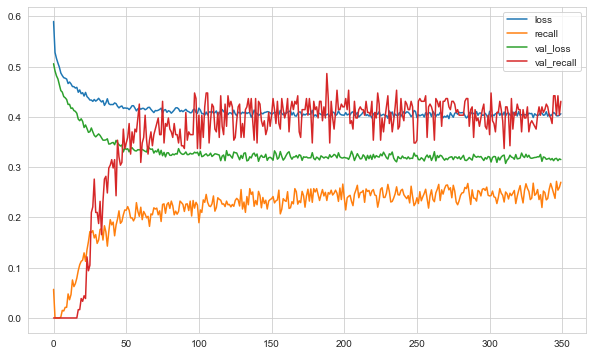

In [84]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [85]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[783  13]
 [137  67]]
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       796
           1       0.84      0.33      0.47       204

    accuracy                           0.85      1000
   macro avg       0.84      0.66      0.69      1000
weighted avg       0.85      0.85      0.82      1000

